In [1]:
import numpy as np
import cvxpy as cp
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Build transportation grah
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(range(6))

# Add edges
G.add_edge(0, 1, weight=11)
G.add_edge(0, 2, weight=8)
G.add_edge(1, 2, weight=10)
G.add_edge(1, 3, weight=12)
G.add_edge(3, 2, weight=4)
G.add_edge(2, 4, weight=11)
G.add_edge(4, 3, weight=7)
G.add_edge(4, 3, weight=7)
G.add_edge(3, 5, weight=15)
G.add_edge(4, 5, weight=4)

In [3]:
# Note minus sign for convention
# In our formulation:
# -> 1 means arc exits node
# -> -1 means arc enters node
A = -nx.linalg.graphmatrix.incidence_matrix(G, oriented=True)
print("A =\n", A.todense())

A =
 [[ 1.  1.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0. -1. -1.  0.  1. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  1.  1. -1.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  1.  1.]
 [ 0.  0.  0.  0.  0.  0. -1.  0. -1.]]


In [4]:
# Get weights, capacities, and supply vectors
c = np.array([G[u][v]['weight'] for u,v in G.edges])
c

array([11,  8, 10, 12, 11,  4, 15,  7,  4])

In [5]:
# SCIPY (HIGHS) runs a simple method, which, as you know, returns exactly integral 
# solutions at vertices. Other solvers such as CLARABEL use interior-point methods 
# and they return slightly imprecise solutions that are not exactly integral.
x = cp.Variable(len(G.edges))
e = np.zeros(len(G.nodes))
e[0] = 1
e[-1] = -1
objective = cp.Minimize(c @ x)
constraints = [A @ x == e, 0 <= x, x <= 1]
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.SCIPY)
print("Optimal cost =", problem.objective.value)

Optimal cost = 23.0


In [6]:
# Show solution
print("x = ", x.value)

x =  [-0.  1. -0. -0.  1. -0. -0. -0.  1.]


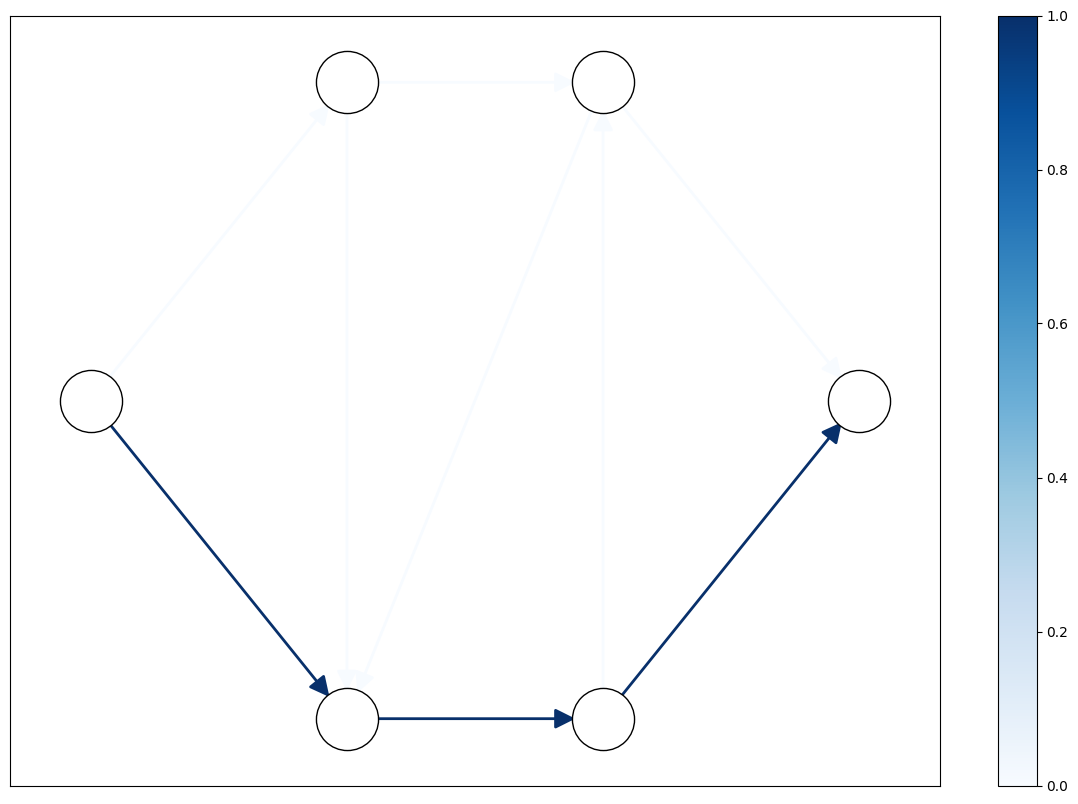

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
cmap = plt.cm.Blues

# Node positions in 2d plot
layout = {0: np.array([0.0, 0.0]),
          1: np.array([0.5, 0.5]),
          2: np.array([0.5, -0.5]),
          3: np.array([1.0, 0.5]),
          4: np.array([1.0, -0.5]),
          5: np.array([1.5, 0.0]),
         }
nx.draw_networkx_nodes(G, layout, node_color='w', edgecolors='k', node_size=2000)

# Draw edges
nx.draw_networkx_edges(G, layout, edge_cmap=cmap, edge_color=x.value, 
                       width=2, arrowsize=30, min_target_margin=20)

# Print colormap
sm = plt.cm.ScalarMappable(cmap=cmap, 
                           norm=plt.Normalize(vmin=0, vmax=1)
                          )
cbar = plt.colorbar(sm, ax=plt.gca())

plt.show()